##### <h1 id="aa" align="center" style="color:white;background:#00858a;padding:18px;border-radius:15px 50px"> 은행 고객 이탈 예측 </h1> 


<img src="https://www.gov.kz/uploads/2021/3/23/c371c8445c5f994aa34def479401c44f_original.309950.jpg">

##### <h1 id="aa" style="color:white;background:#00a6b2;padding:8px;border-radius:8px"> 목차 </h1> 
* [소개](#소개)
* [데이터 로드 ](#section-two)
* [탐색적 데이터 분석 ](#탐색적-데이터-분석)
    - [일반 정보](#일반-정보)
    - [타겟 변수 시각화](#타겟-변수-시각화)
    - [변수 간 관계 및 상관 분석](#변수-관계-상관-분석) 
    - [명목형 특성 분석](#명목형-특성-분석)  
    - [수치형 특성 분석](#수치형-특성-분석) 
    - [Gender](#Gender) 
    - [Age](#Age) 
    - [NumOfProducts](#NumOfProducts) 
* [특성 엔지니어링](#특성-엔지니어링)
* [모델링](#모델링)
* [결론](#결론)


<a id="소개"></a>
# <h1 id="aa" style="color:white;background:#00a6b2;padding:8px;border-radius:8px"> 소개 </h1> 


고객 이탈 예측은 이진 분류 문제입니다. 이탈한 고객과 남아 있는 고객을 구별해야 합니다. 그러나 이 문제는 좋은 모델을 구축하는 것으로 끝나지 않습니다. 특성 자체가 중요한 역할을 합니다. - 패턴을 파악하면 모델 성능을 향상시킬 뿐만 아니라, 기업이 고객 이탈을 줄이기 위해 집중해야 할 요소를 이해하는 데 도움이 됩니다.


<h1 id="aa" style="color:white;background:#00a6b2;padding:8px;border-radius:8px" > 목표: </h1>
<ul>
<li> 제공된 데이터의 패턴 분석 </li>
<li> 훈련 및 테스트 데이터 세트 준비</li>
<li> 랜덤 포레스트 및 로지스틱 회귀 모델 적용 </li>
</ul>
 

<h1 id="aa" style="color:white;background:#00a6b2;padding:8px;border-radius:8px"> 데이터 세트 설명 </h1>

행은 고객을 나타내고, 열은 고객의 속성입니다.


각 속성의 설명:
<ul>
<li>RowNumber — 행 번호</li>
<li>CustomerId — 고객의 고유 번호</li>
<li>Surname — 고객 성 </li>
<li>CreditScore — 신용 등급 </li>
<li>Geography — 고객 국가</li>
<li>Gender — 고객 성별</li>
<li>Age — 사용자 연령</li>
<li>Tenure — 은행과 함께한 연수 </li>
<li>Balance — 사용자 계좌 잔액</li>
<li>HasCrCard — 고객이 신용카드를 보유하고 있는지 여부</li>
<li>NumOfProducts — 고객이 은행에서 구매한 상품 수</li>
<li>IsActiveMember — 활성 고객 </li>
<li>EstimatedSalary — 급여 규모</li>
<li>Exited — 고객이 은행을 떠났는지 여부 </li>    
</ul>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
bank_df = pd.read_csv('./data/bank_churn.csv')
display(bank_df)
display(bank_df.info())
display(bank_df.describe())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



bank_df['EstimatedSalary'] = bank_df['EstimatedSalary'].astype(int)
bank_df['Balance'] = bank_df['Balance'].astype(int)

bank_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 'Card Type'], inplace=True)

#Label Encoding
le = LabelEncoder()
label_col = ['Geography', 'Gender']
for col in label_col:
    bank_df[col] = le.fit_transform(bank_df[col])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'CreditScore'),
  Text(1.5, 0, 'Geography'),
  Text(2.5, 0, 'Gender'),
  Text(3.5, 0, 'Age'),
  Text(4.5, 0, 'Tenure'),
  Text(5.5, 0, 'Balance'),
  Text(6.5, 0, 'NumOfProducts'),
  Text(7.5, 0, 'HasCrCard'),
  Text(8.5, 0, 'IsActiveMember'),
  Text(9.5, 0, 'EstimatedSalary'),
  Text(10.5, 0, 'Exited'),
  Text(11.5, 0, 'Complain'),
  Text(12.5, 0, 'Satisfaction Score'),
  Text(13.5, 0, 'Point Earned')])

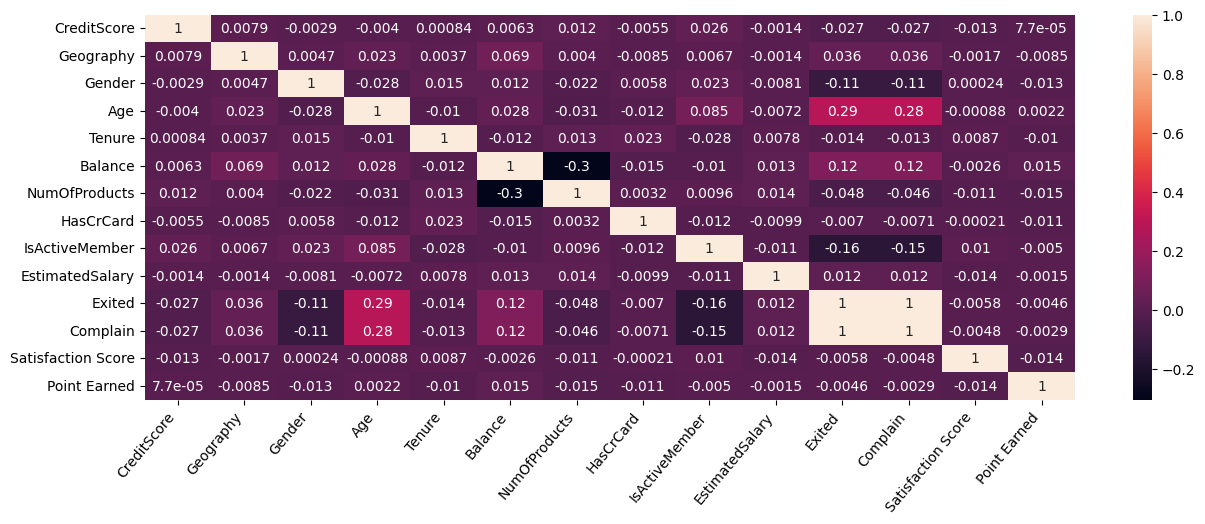

In [36]:
plt.figure(figsize=(15, 5))
sns.heatmap(bank_df.corr(), annot=True)
plt.xticks(rotation=50, ha='right')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = bank_df.drop(columns=["Exited"])
y = bank_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # test_size = 0.22, random_state = 100

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 13), (2500, 13), (7500,), (2500,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"==== {name} ====")
    print(f"train score : {model.score(X_train, y_train)}, test score : {model.score(X_test, y_test)}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*30 + "\n")

# 결과 확인
results

==== Logistic Regression ====
train score : 0.9985333333333334, test score : 0.9988
Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      1.00      1.00       497

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



==== Random Forest ====
train score : 1.0, test score : 0.9988
Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      1.00      1.00       497

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



==== XGBoost ====
train score : 1.0, test score : 0.9988
Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.0

c:\Users\DawnSurplus\anaconda3\envs\python_3_12\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:08:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Logistic Regression': 0.9988, 'Random Forest': 0.9988, 'XGBoost': 0.9988}

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,0,92888.52,1,True,False,True


c:\Users\DawnSurplus\anaconda3\envs\python_3_12\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:31:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


==== Random Forest ====
Accuracy: 0.8195
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1751
           1       0.55      0.61      0.58       449

    accuracy                           0.82      2200
   macro avg       0.73      0.74      0.73      2200
weighted avg       0.83      0.82      0.82      2200

==== XGBoost ====
Accuracy: 0.8218
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1751
           1       0.56      0.59      0.58       449

    accuracy                           0.82      2200
   macro avg       0.73      0.74      0.73      2200
weighted avg       0.83      0.82      0.82      2200



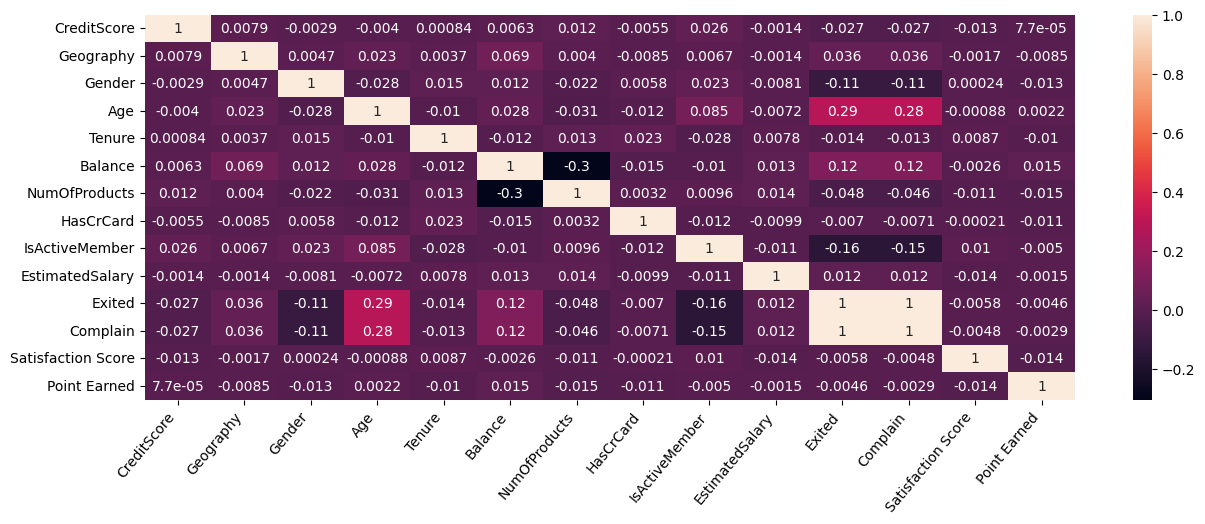

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA



# 1. 데이터 로드
df = pd.read_csv("./data/bank_churn.csv")

# 2. 불필요한 열 제거
df.drop(columns=["RowNumber", "CustomerId", "Surname", "Complain", "HasCrCard", "Satisfaction Score", "Card Type", "Point Earned"], inplace=True)

# 3. 범주형 변수 인코딩
# label_encoders = {}
# for col in ["Geography", "Gender"]:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# 원-핫 인코딩
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
display(df)

# 상관관계 확인
plt.figure(figsize=(15, 5))
sns.heatmap(bank_df.corr(), annot=True)
plt.xticks(rotation=50, ha='right')

# 4. 특성과 타겟 분리
X = df.drop(columns=["Exited"])
y = df["Exited"]

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=100)

# 6. SMOTE 적용 (데이터 불균형 해소)
smote = SMOTE(sampling_strategy = 1)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. 특성 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. 모델 및 하이퍼파라미터 튜닝 설정
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

xgb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

# 9. 교차 검증 및 하이퍼파라미터 튜닝
def tune_model(model, param_grid):
    search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=StratifiedKFold(n_splits=5),
                                scoring="accuracy", random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    return search.best_estimator_

best_rf = tune_model(RandomForestClassifier(random_state=42), rf_params)
best_xgb = tune_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params)

# 10. 최종 평가
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"==== {name} ====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*30)

evaluate_model(best_rf, "Random Forest")
evaluate_model(best_xgb, "XGBoost")



# # PCA를 사용하여 2D로 변환
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # 시각화 함수 정의
# def plot_decision_boundary(model, X, y, title):
#     h = 0.02  # 그래프의 해상도
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
#     plt.title(title)
#     plt.xlabel("PCA Component 1")
#     plt.ylabel("PCA Component 2")

# # 랜덤 포레스트 결정 경계
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plot_decision_boundary(best_rf, X_train_pca, y_train, "Random Forest - Decision Boundary")

# # XGBoost 결정 경계
# plt.subplot(1, 2, 2)
# plot_decision_boundary(best_xgb, X_train_pca, y_train, "XGBoost - Decision Boundary")

# plt.tight_layout()
# plt.show()
